In [1]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import g4root_to_df
from root_pandas import read_root
import pandas as pd
from mu2e.mu2eplots import mu2e_plot3d_ptrap
from mu2e.mu2eplots import mu2e_plot3d_ptrap_traj
from mu2e.mu2eplots import mu2e_plot3d_ptrap_anim
import mu2e.mu2eplots as mplt
import six.moves.cPickle as pkl
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
mu2e_data_path = '/Volumes/DataDump/Mu2E/'
from skhep.visual import MplPlotter as splt
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.10/04


/usr/local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/usr/local/Cellar/root/6.10.04/lib/root/ROOT.py:318: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [2]:
# Get pions, make a subset df of matching pions and muons

df_ntpart, _, _ = g4root_to_df(mu2e_data_path+'pion-st-Mau12/run2/nts.bpollack.pions_Mau12_stage1_vd.v650p.combined',
do_basic_modifications=True, trees=['part'])
df_ntpart.set_index(['run', 'subrun', 'evt'], inplace=True)

# df_mu_and_pi = df_ntpart.loc[df_ntpart.query('pdg==-211').index]
# df_mu_and_pi = df_mu_and_pi.loc[df_mu_and_pi.query('pdg==13').index]

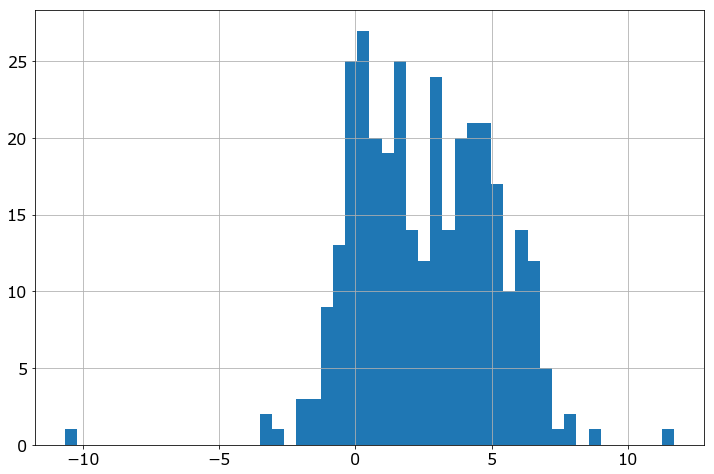

In [15]:
df_ntpart.query('tstop>698').pzstop.hist(bins=50)

In [11]:
store_xray = pd.HDFStore(mu2e_data_path+'G4ParticleSim/low_e_ele_0T_v580.h5')
df_xray = store_xray.df_ntpart
store_xray.close()

In [19]:
mu2e_plot3d_ptrap(df_ntpart.query('pstop>10'),
                  'zstop','xstop','ystop', x_range=[3700,17500], y_range = [-1000,1000], z_range=[-1000,1000], save_name=None,
                   df_xray=df_xray, color='pstop', title='Muon position at event termination')

binning...
binned


In [6]:
df_ntpart.query('pdg==-211').shape

(39500652, 42)

In [10]:
df_ntpart.query('pdg==13 and tstop>699').shape

(870, 42)

In [10]:
df_pions = df_ntpart.query('pdg==-211')

# Observations

40m Pions Generated, 52-80 MeV mom

    1) Low Z region: Around the OPA.
        a) Primary Ring at Z=~5000
        b) Secondary Ring at Z=~5660
        c) Tertiary Ring? at Z=~6300
    2) Tracker section:
        a) Primary Group at 9200<Z<11000
        b) Secondary Group at Z=~11700
    3) Calo section:
        a) Single group at Z=~13000

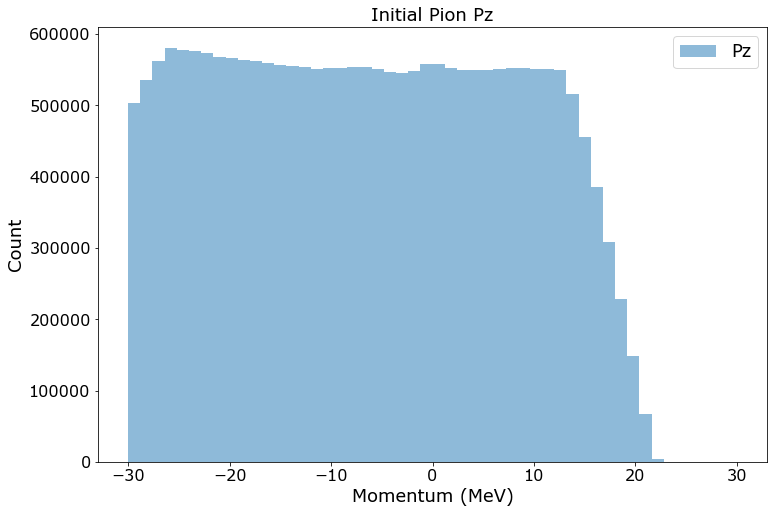

In [23]:
_ = splt.hist(df_ntpart.parent_pz.values, bins=50, range=(-30,30), label='Pz')
plt.legend()
plt.title('Initial Pion Pz')
plt.xlabel('Momentum (MeV)')
plt.ylabel('Count')


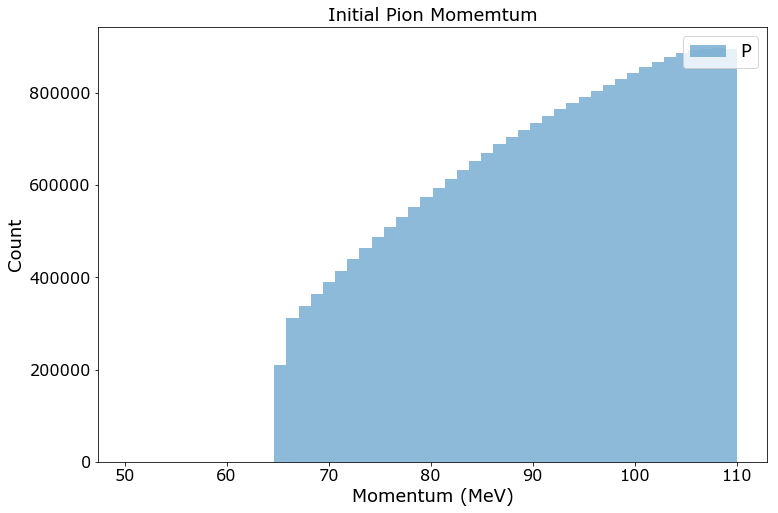

In [24]:
_ = splt.hist(df_ntpart.parent_p.values, bins=50, label='P')
plt.legend()
plt.title('Initial Pion Momemtum')
plt.xlabel('Momentum (MeV)')
plt.ylabel('Count')

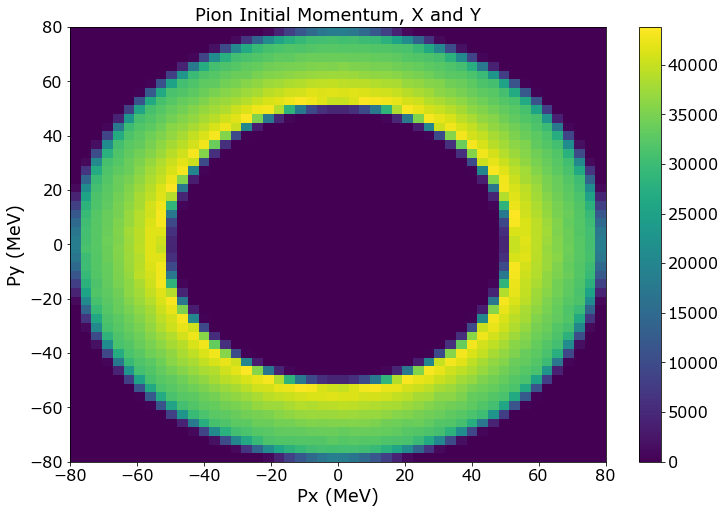

In [16]:
plt.hist2d(df_pions.px.values, df_pions.py.values, bins=50)
plt.xlabel('Px (MeV)')
plt.ylabel('Py (MeV)')
plt.title('Pion Initial Momentum, X and Y')
plt.colorbar()

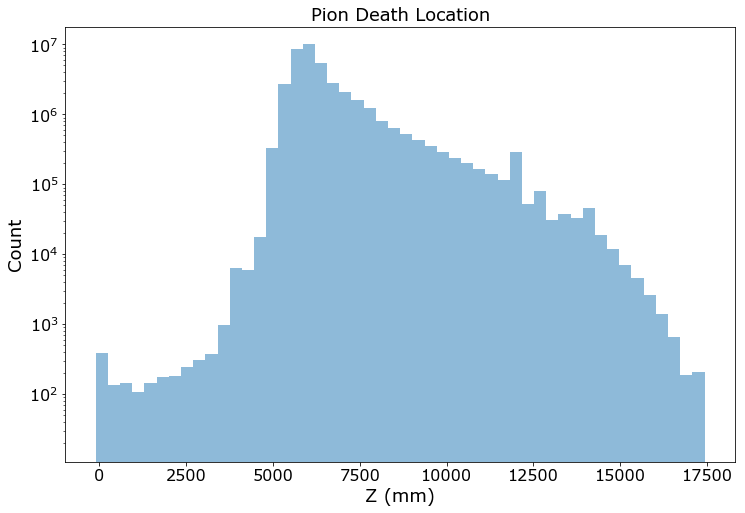

In [23]:
_ = splt.hist(df_pions.zstop.values, bins=50, log=True)
plt.title('Pion Death Location')
plt.xlabel('Z (mm)')
plt.ylabel('Count')

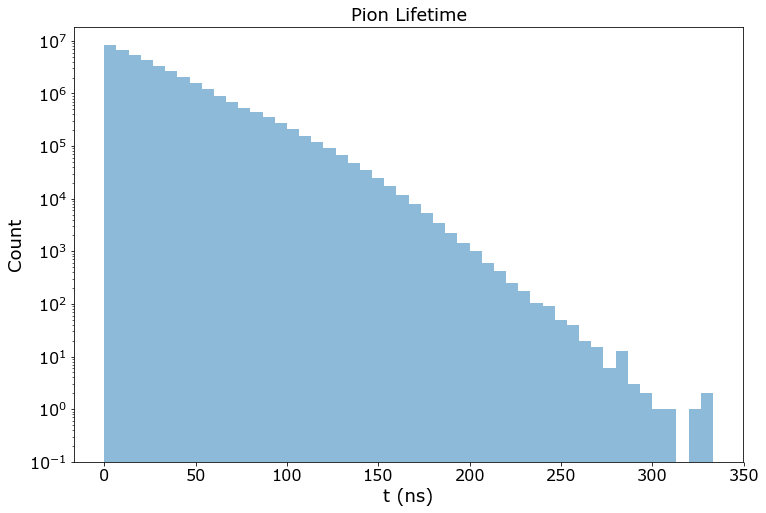

In [14]:
_ = splt.hist(df_pions.tstop.values, bins=50, log=True)
plt.title('Pion Lifetime')
plt.xlabel('t (ns)')
plt.ylabel('Count')

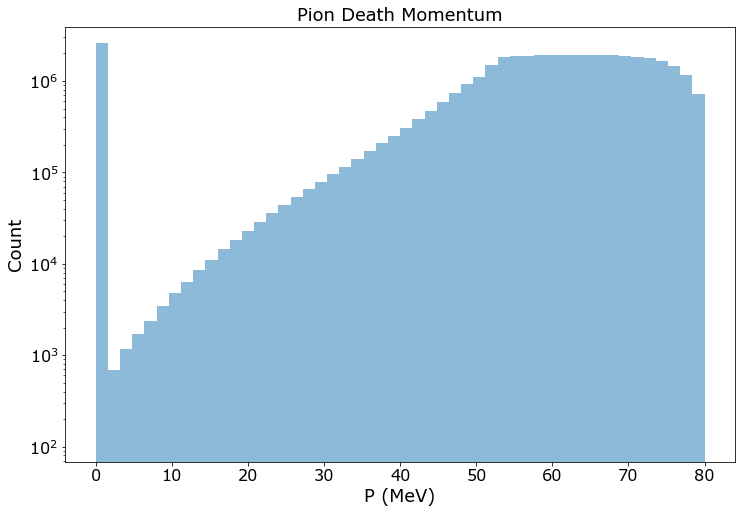

In [25]:
_ = splt.hist(df_pions.pstop.values, bins=50, log=True)
plt.title('Pion Death Momentum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')

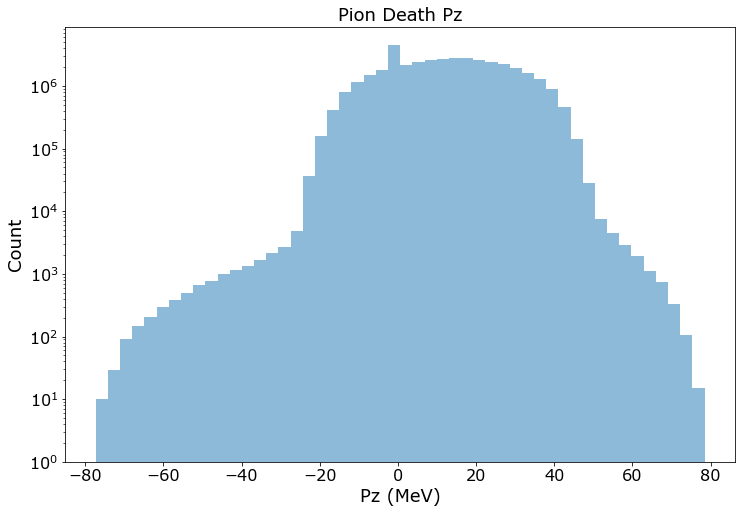

In [13]:
_ = splt.hist(df_pions.pzstop.values, bins=50, log=True)
plt.title('Pion Death Pz')
plt.xlabel('Pz (MeV)')
plt.ylabel('Count')

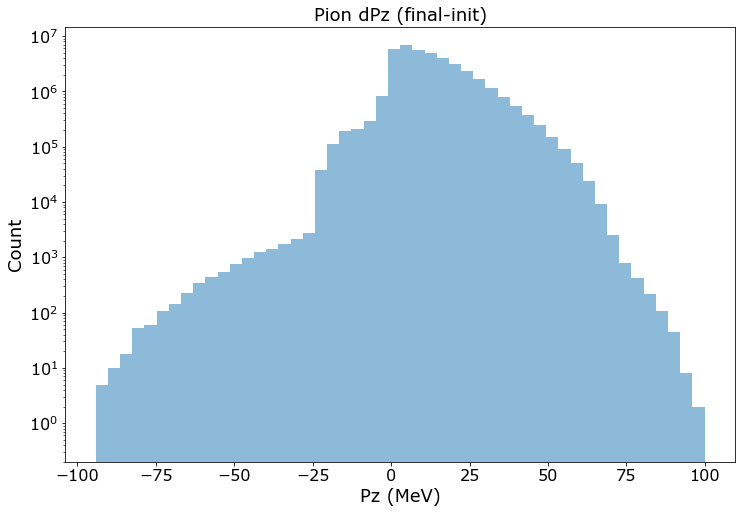

In [11]:
_ = splt.hist(df_pions.pzstop.values-df_pions.pz.values, bins=50, log=True)
plt.title('Pion dPz (final-init)')
plt.xlabel('Pz (MeV)')
plt.ylabel('Count')

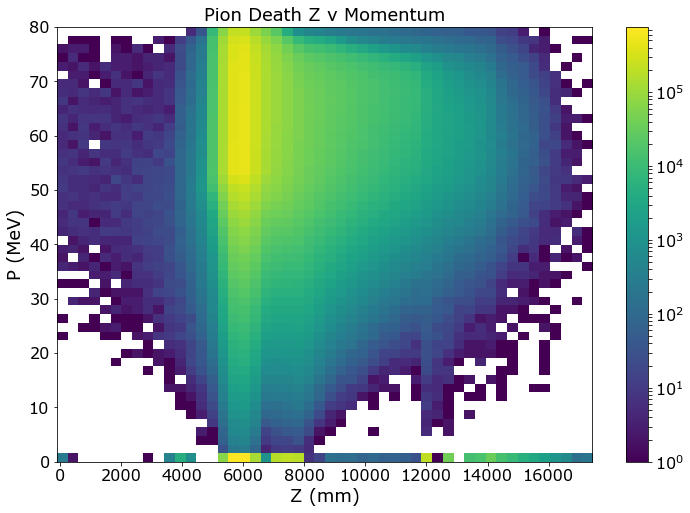

In [28]:
from matplotlib.colors import LogNorm

_ = plt.hist2d(df_pions.zstop.values,df_pions.pstop.values, bins=50, norm=LogNorm())
plt.title('Pion Death Z v Momentum')
plt.xlabel('Z (mm)')
plt.ylabel('P (MeV)')
plt.colorbar()

In [4]:
df_mu = df_ntpart.query('pdg==13')

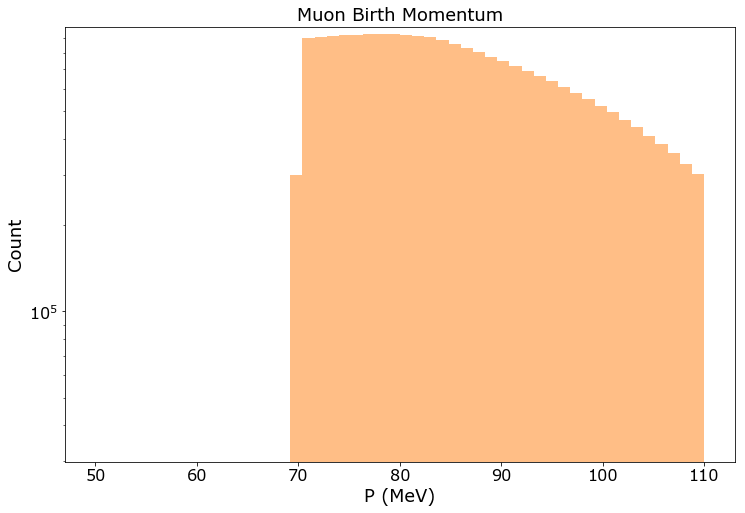

In [17]:
_ = splt.hist(df_ntpart.p.values, bins=50, log=True, color='C1', range=(50,110))
plt.title('Muon Birth Momentum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')

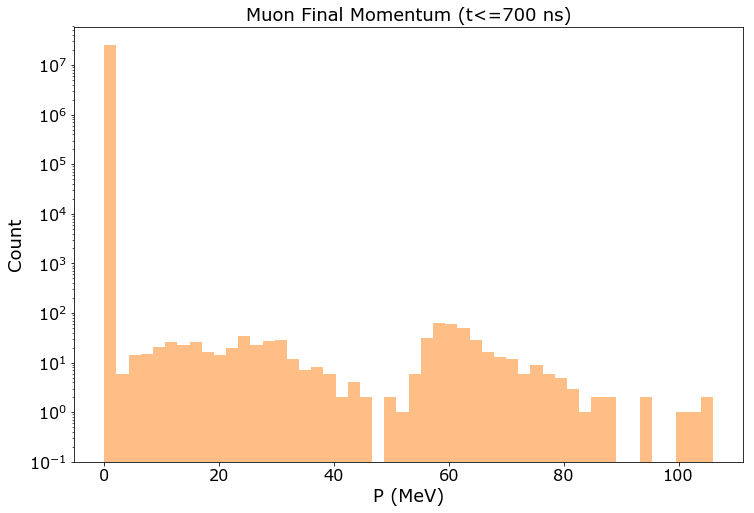

In [18]:
_ = splt.hist(df_ntpart.pstop.values, bins=50, log=True, color='C1')
plt.title('Muon Final Momentum (t<=700 ns)')
plt.xlabel('P (MeV)')
plt.ylabel('Count')

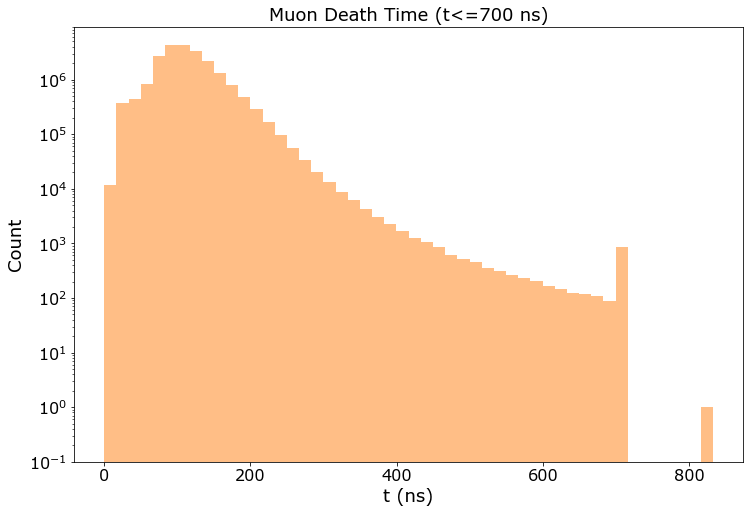

In [35]:
_ = splt.hist(df_mu.tstop.values, bins=50, log=True, color='C1')
plt.title('Muon Death Time (t<=700 ns)')
plt.xlabel('t (ns)')
plt.ylabel('Count')

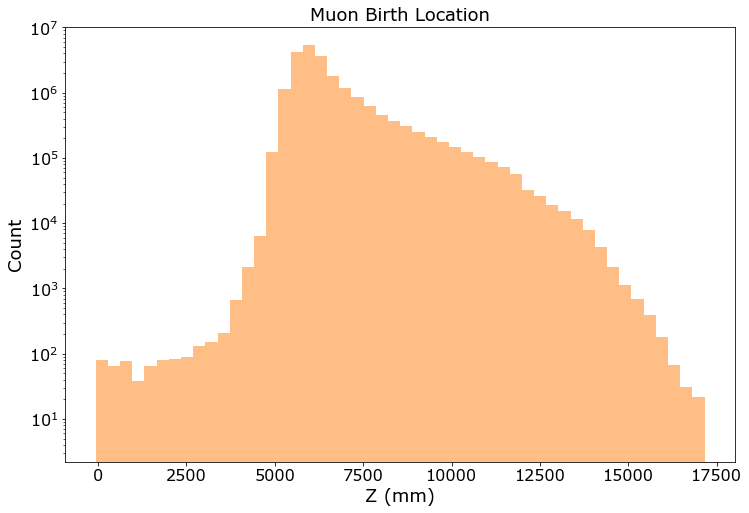

In [43]:
_ = splt.hist(df_mu.z.values, bins=50, log=True, color='C1')
plt.title('Muon Birth Location')
plt.xlabel('Z (mm)')
plt.ylabel('Count')

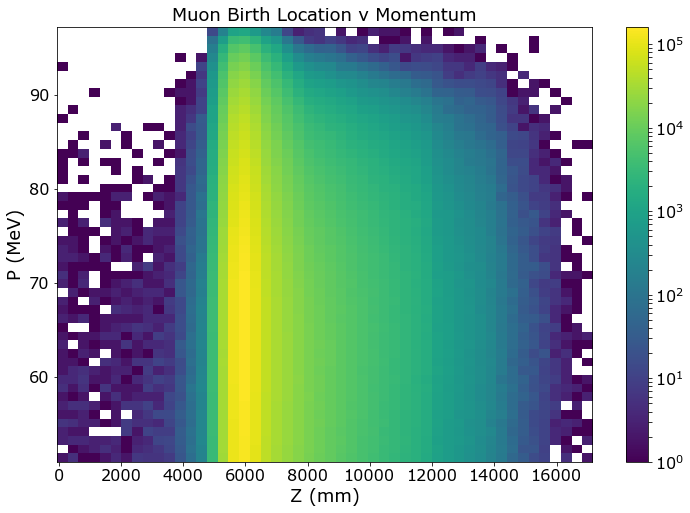

In [44]:
plt.hist2d(df_mu.z.values, df_mu.p.values, bins=50, norm=LogNorm())
plt.title('Muon Birth Location v Momentum')
plt.xlabel('Z (mm)')
plt.ylabel('P (MeV)')
plt.colorbar()

In [15]:
df_mu_bad = df_mu.query('9600<z<13300 and p>75')

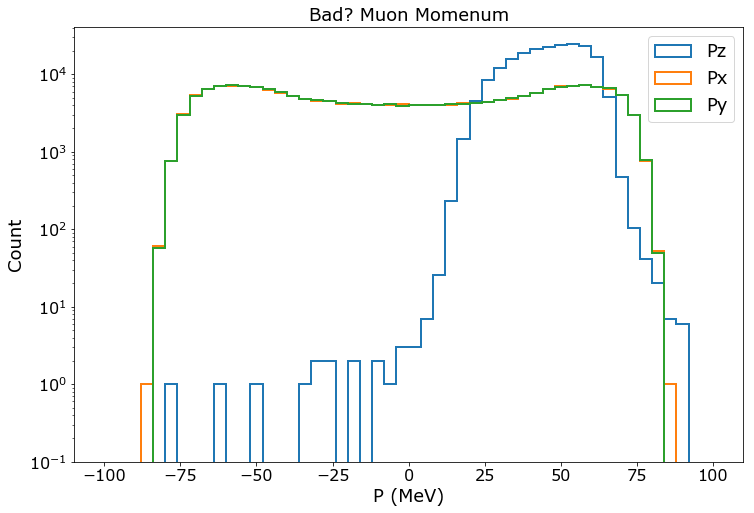

In [50]:
_ = splt.hist(df_mu_bad.pz.values, bins=50, log=True, histtype='step', label='Pz', range=(-100,100))
_ = splt.hist(df_mu_bad.px.values, bins=50, log=True, histtype='step', label='Px', range=(-100,100))
_ = splt.hist(df_mu_bad.py.values, bins=50, log=True, histtype='step', label='Py', range=(-100,100))
plt.title('Bad? Muon Momenum')
plt.xlabel('P (MeV)')
plt.ylabel('Count')
plt.legend()

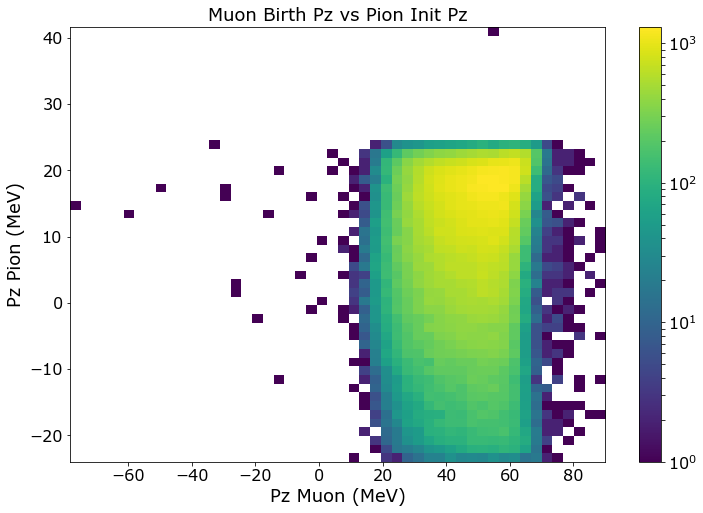

In [51]:
plt.hist2d(df_mu_bad.pz.values, df_mu_bad.parent_pz.values, bins=50, norm=LogNorm())
plt.title('Muon Birth Pz vs Pion Init Pz')
plt.xlabel('Pz Muon (MeV)')
plt.ylabel('Pz Pion (MeV)')
plt.colorbar()

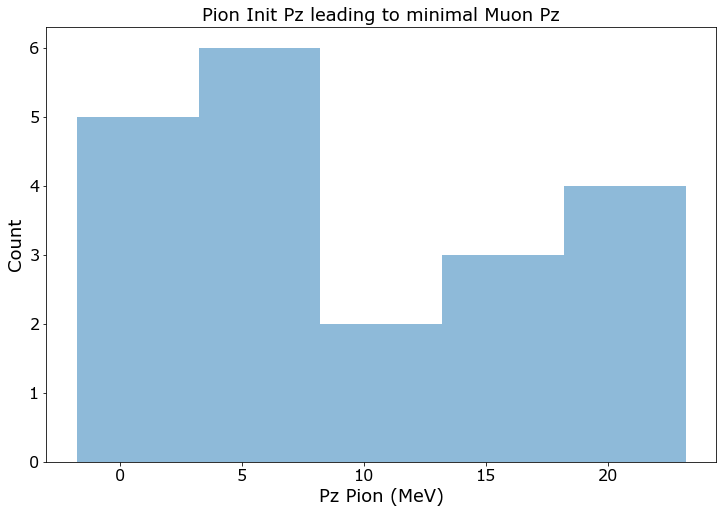

In [18]:
_ = splt.hist(df_mu_bad[(df_mu_bad.pz<10)&(df_mu_bad.pz>-10)].parent_pz.values, bins=5)
plt.title('Pion Init Pz leading to minimal Muon Pz')
plt.xlabel('Pz Pion (MeV)')
plt.ylabel('Count')

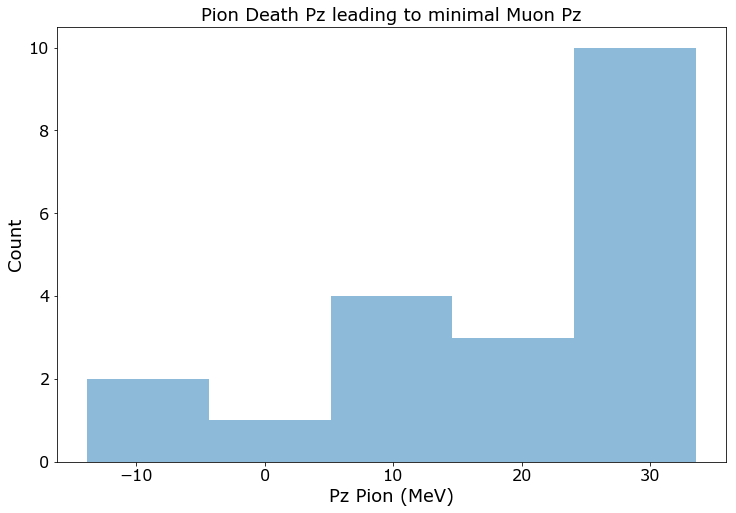

In [17]:
_ = splt.hist(df_mu_bad[(df_mu_bad.pz<10)&(df_mu_bad.pz>-10)].parent_pzstop.values, bins=5)
plt.title('Pion Death Pz leading to minimal Muon Pz')
plt.xlabel('Pz Pion (MeV)')
plt.ylabel('Count')

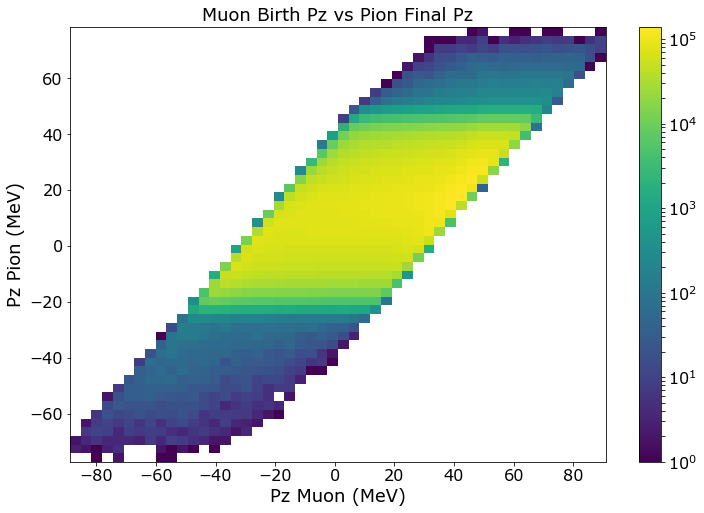

In [21]:
plt.hist2d(df_mu.pz.values, df_mu.parent_pzstop.values, bins=50, norm=LogNorm())
plt.title('Muon Birth Pz vs Pion Final Pz')
plt.xlabel('Pz Muon (MeV)')
plt.ylabel('Pz Pion (MeV)')
plt.colorbar()

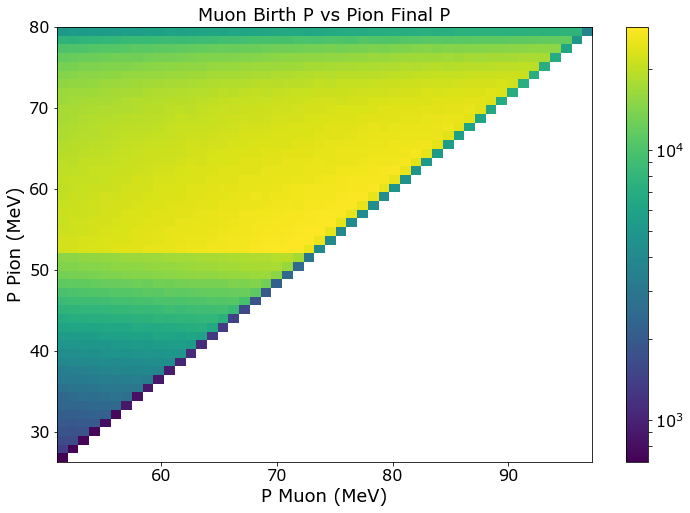

In [22]:
plt.hist2d(df_mu.p.values, df_mu.parent_pstop.values, bins=50, norm=LogNorm())
plt.title('Muon Birth P vs Pion Final P')
plt.xlabel('P Muon (MeV)')
plt.ylabel('P Pion (MeV)')
plt.colorbar()

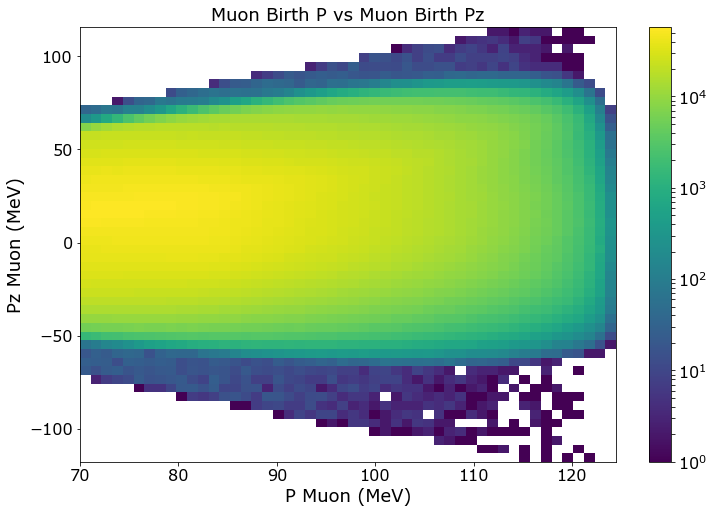

In [21]:
plt.hist2d(df_ntpart.p.values, df_ntpart.pz.values, bins=50, norm=LogNorm())
plt.title('Muon Birth P vs Muon Birth Pz')
plt.xlabel('P Muon (MeV)')
plt.ylabel('Pz Muon (MeV)')
plt.colorbar()